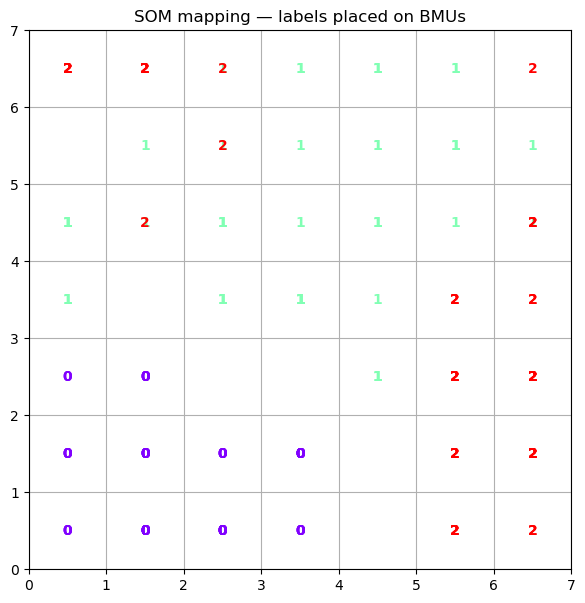


📘 Class Legend:
0 → Iris-setosa
1 → Iris-versicolor
2 → Iris-virginica


In [1]:
# ====== Install dependency (run in terminal, not inside script) ======
# pip install minisom

# ====== 1. Imports ======
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
# (Optional) from sklearn.datasets import load_iris  # if you want to load built-in iris

# ====== 2. Load data ======
# Option A: Load from CSV (if you have iris_dataset.csv)
file_path = 'iris_dataset.csv'
data = pd.read_csv(file_path)

# Option B: (Alternative) use sklearn built-in iris
# from sklearn.datasets import load_iris
# iris = load_iris(as_frame=True)
# data = iris.frame

# Features and labels
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']   # numeric labels: 0,1,2

# ====== 3. Scale features to [0,1] ======
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)   # shape -> (n_samples, n_features)

# ====== 4. Initialize and train SOM ======
som = MiniSom(
    x=7,                      # grid width (columns)
    y=7,                      # grid height (rows)
    input_len=X_scaled.shape[1],  # number of features per sample (4 for iris)
    sigma=1.0,                # neighborhood radius
    learning_rate=0.5         # step size for weight updates
)
som.random_weights_init(X_scaled)      # initialize weights
print("Training SOM... Please wait.")
som.train_random(X_scaled, num_iteration=1000)  # Train for 1000 iterations
print("✅ Training completed successfully!")

# ====== 5. Visualize: place each sample's label on its BMU ======
plt.figure(figsize=(7, 7))
for i, x in enumerate(X_scaled):
    bmu = som.winner(x)                # best matching unit (tuple: (col, row))
    plt.text(
    bmu[0] + 0.5, 
    bmu[1] + 0.5, 
    str(int(y.iloc[i])),                 # display class label (0,1,2)
    color=plt.cm.rainbow(y.iloc[i] / 2), # assign color based on class
    fontdict={'size': 10, 'weight': 'bold'},
    ha='center', va='center'             # center the text in the neuron
 )


# Set plot limits so the whole grid is visible
plt.xlim([0, som.get_weights().shape[0]])
plt.ylim([0, som.get_weights().shape[1]])
plt.title('SOM mapping — labels placed on BMUs')
plt.grid(True)
plt.show()

# -------------------------------------------------
# STEP 7: Print Class Legend for clarity
# -------------------------------------------------
print("\n📘 Class Legend:")
print("0 → Iris-setosa")
print("1 → Iris-versicolor")
print("2 → Iris-virginica")
